<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
Missing values:
 Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            

/tmp/ipykernel_2964/1910346569.py:19: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


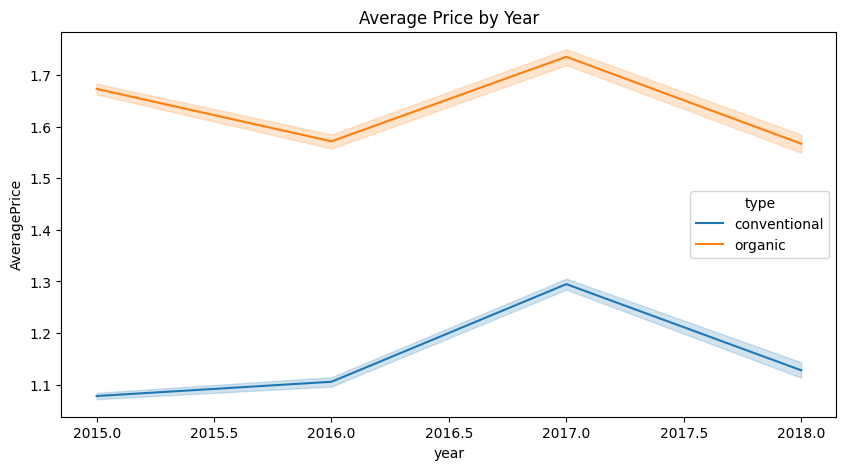

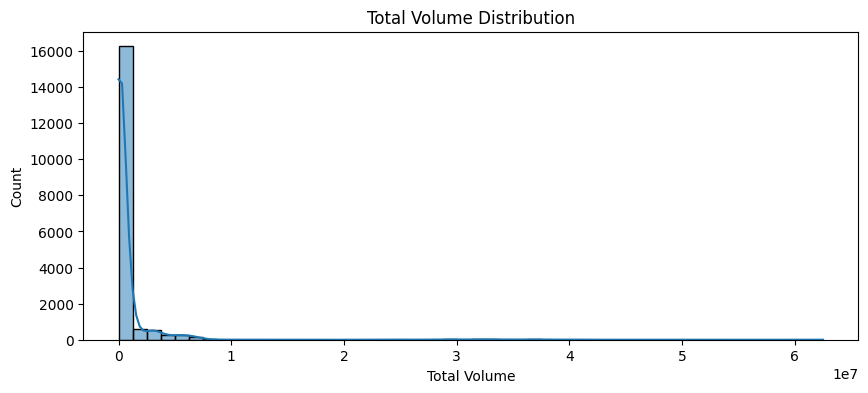

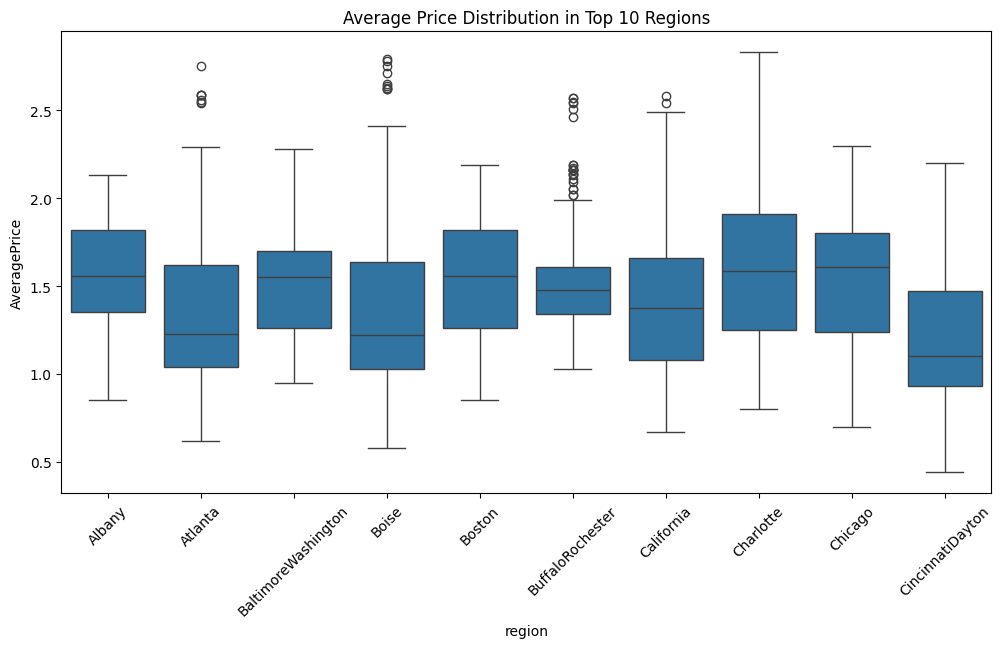

Dataset covers 2015-01-04 to 2018-03-25
Total records: 18249, Regions: 54


In [ ]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset
df = pd.read_csv("../dataset/avocado_retail_sales.csv")

# 3. View basic info
df.head()
df.info()
df.describe()

#4. check for missing values and duplicates
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:\n", df.duplicated().sum())

#5. convert datecolumn
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)

#6. explore categorical columns 
print("Type values:", df['type'].unique())
print("Number of regions:", df['region'].nunique())

#7. visualizatons : 
# average price per year
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='year', y='AveragePrice', hue='type')
plt.title("Average Price by Year")
plt.show()
 
#8. total volume distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['Total Volume'], bins=50, kde=True)
plt.title("Total Volume Distribution")
plt.show()
 
#9. average price per region 
top_regions = df['region'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['region'].isin(top_regions)], x='region', y='AveragePrice')
plt.xticks(rotation=45)
plt.title("Average Price Distribution in Top 10 Regions")
plt.show()

# summary 
print(f"Dataset covers {df['Date'].min().date()} to {df['Date'].max().date()}")
print(f"Total records: {len(df)}, Regions: {df['region'].nunique()}")
